# Sammenlikning

## Imports osv

In [338]:
# Installing packages
!pip install webdriver-manager plotnine selenium hdbscan beautifulsoup4 keybert pycryptodome sentence-transformers PyPDF2 --quiet

# Importing the transformer
from sentence_transformers import SentenceTransformer

# Basic imports
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import scipy as sc
import requests
import torch
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
from sklearn.manifold import TSNE
from keybert import KeyBERT
from sklearn.decomposition import PCA   

# Special imports for plots
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression

# Imports for the widgets
from ipywidgets import widgets, interact
from IPython.display import display, clear_output

#Imports for decrypting urls to pdfs or html
from urllib.parse import urljoin
import re
import requests
import PyPDF2
from bs4 import BeautifulSoup
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


DEPRECATION: Loading egg at /opt/anaconda3/envs/embed/lib/python3.12/site-packages/sacremoses-0.0.43-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


## 1) Selskaper

### Nyhetsartikler

In [477]:
# Average the embeddings for each year, SNITT-TEKSTEN
# tar gjennomsnittet av hver akse for å finne én representativ vektor
def snitt(embeddings):
  snitt = [emb.mean(dim=0).numpy() for emb in embeddings]
  return snitt

In [478]:
with open('Exxon_news_embeddings.pkl', 'rb') as file:
    exxon = pickle.load(file)

exxon = snitt(exxon)
print(f"Exxon ({len(exxon)}): {exxon}")


with open('totalenergies_newsembeddings_2015_2024.pickle', 'rb') as file:
    totalEnergies = pickle.load(file)

totalEnergies = snitt(totalEnergies)
print(f"TotalEnergies ({len(totalEnergies)}): {totalEnergies}")


with open('AkerBP_news_embeddings.pkl', 'rb') as file:
    akerBP = pickle.load(file)

akerBP = snitt(akerBP)
print(f"AkerBP ({len(akerBP)}): {akerBP}")


with open("Equinor_news_embeddings.pkl", "rb") as file:
    equinor = pickle.load(file)



Exxon (9): [array([-0.24312055,  0.5051784 ,  0.1549819 , ..., -0.6929625 ,
       -0.24416393,  0.20473239], dtype=float32), array([-0.29078484,  0.5914777 ,  0.13950814, ..., -0.7001572 ,
       -0.25072357,  0.20023325], dtype=float32), array([-0.20187528,  0.6276899 ,  0.10301138, ..., -0.74484354,
       -0.26047188,  0.18062863], dtype=float32), array([-0.24780482,  0.5994666 ,  0.07525771, ..., -0.7720047 ,
       -0.2908926 ,  0.16564277], dtype=float32), array([-0.22474691,  0.5233269 , -0.01631049, ..., -0.7311823 ,
       -0.29212835,  0.04337287], dtype=float32), array([-0.23074628,  0.52626956,  0.08668005, ..., -0.7644288 ,
       -0.36406428,  0.02450266], dtype=float32), array([-0.26597995,  0.5513826 ,  0.03799932, ..., -0.81161195,
       -0.4229434 ,  0.01807259], dtype=float32), array([-0.29241958,  0.46201125,  0.14774753, ..., -0.61416876,
       -0.35401216,  0.04904832], dtype=float32), array([-0.24218343,  0.52749103,  0.07972469, ..., -0.6482674 ,
       -0.38

In [479]:
print(f"Equinor ({len(equinor)}): {equinor}")

Equinor (33): [array([ 0.00628972,  0.5140994 , -0.11278655, ..., -0.74052024,
       -0.28695226,  0.2606086 ], dtype=float32), array([ 0.05692247,  0.4624728 , -0.12335625, ..., -0.7316452 ,
       -0.29584137,  0.25456998], dtype=float32), array([ 0.03271852,  0.52374977, -0.12019218, ..., -0.76766545,
       -0.2823414 ,  0.26829407], dtype=float32), array([ 0.03993362,  0.4897043 , -0.09589576, ..., -0.7774776 ,
       -0.2246303 ,  0.2328786 ], dtype=float32), array([ 0.01894011,  0.50523853, -0.09681363, ..., -0.672995  ,
       -0.22229744,  0.22244573], dtype=float32), array([ 0.05121017,  0.47856262, -0.06023577, ..., -0.7261618 ,
       -0.21635652,  0.23589897], dtype=float32), array([ 0.02961165,  0.48166484, -0.0937364 , ..., -0.7554342 ,
       -0.25718394,  0.2697825 ], dtype=float32), array([ 0.07576643,  0.5379876 , -0.10165299, ..., -0.73802614,
       -0.21890992,  0.24842939], dtype=float32), array([ 0.08870376,  0.48268935, -0.03173043, ..., -0.68965286,
       -0

In [480]:
embeddings = {}
embeddings["Exxon"] = exxon
embeddings["TotalEnergies"] = totalEnergies
embeddings["AkerBP"] = akerBP

In [481]:
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

In [482]:
# Centroid: Ordet vi sammenlikner med
centroid = "Sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.2970,  1.0930, -0.6076,  ..., -0.5267,  0.2391,  0.0083]])

In [483]:
# Gir embeddingene en score basert på avstand til centroid-ordet
def embedding_score(text_embeddings, centroid_embedding,alpha):
    distances = sc.spatial.distance.cdist(text_embeddings, centroid_embedding, "cosine")
    score = 1/(distances**alpha)
    sum = score.sum()
    return score/sum

In [484]:
# Compute the scores for each company
alpha = 5
scores = {}
for company, emb_list in embeddings.items():
    scores[company] = embedding_score(emb_list, centroid_embedding, alpha).tolist()

scores

{'Exxon': [[0.08601454772322395],
  [0.08694591668600507],
  [0.07867809629284847],
  [0.08690697574380599],
  [0.12986316733041997],
  [0.15855330296978065],
  [0.14128687984349922],
  [0.11507474319514398],
  [0.11667637021527263]],
 'TotalEnergies': [[0.022176957767944375],
  [0.1371021944840475],
  [0.07735188377704505],
  [0.08266483976720294],
  [0.0712148287742152],
  [0.10573110918080626],
  [0.13168313795003053],
  [0.08711478909342583],
  [0.15916374399428643],
  [0.12579651521099586]],
 'AkerBP': [[0.06540684279312063],
  [0.07286727968538637],
  [0.0802741552074749],
  [0.10604961113554337],
  [0.08421334829557903],
  [0.15398543373673143],
  [0.13769194827731715],
  [0.16887216146541686],
  [0.1306392194034302]]}

In [485]:
# Define the years for each company
years = {
    'Exxon': list(range(2016, 2025)),
    'TotalEnergies': list(range(2015, 2025)),
    'AkerBP': list(range(2016, 2025))
}

# Prepare data for plotting
plot_data = {
    'Exxon': scores['Exxon'],
    'TotalEnergies': scores['TotalEnergies'],
    'AkerBP': scores['AkerBP']
}

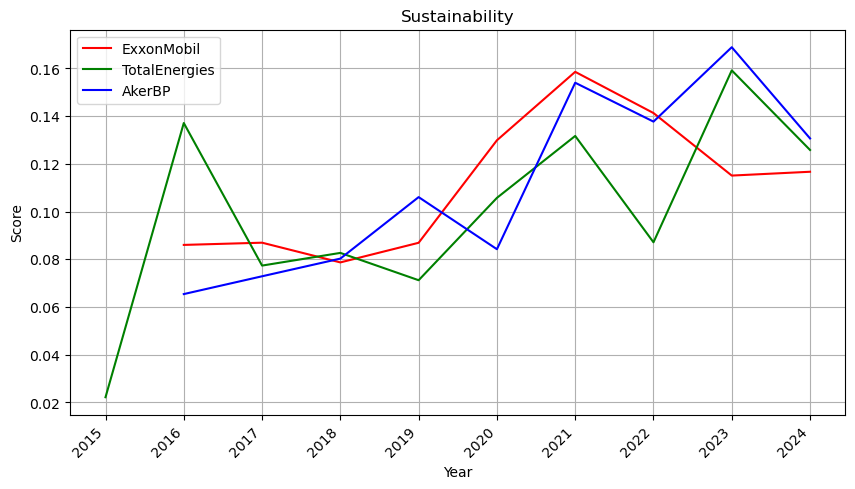

In [486]:
# Combine all years into a single list and remove duplicates
all_years = sorted(set(years['Exxon'] + years['TotalEnergies'] + years['AkerBP']))

# Define the colors and labels for each company
colors = ['r', 'g', 'b']
labels = ["ExxonMobil", "TotalEnergies", "AkerBP"]

plt.figure(figsize=(10, 5))
plt.title(f'')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)

# Plot the scores for each company
for i, company in enumerate(plot_data.keys()):
    plt.plot(years[company], plot_data[company], color=colors[i], label=labels[i])

# Customize x-axis ticks to show all years
plt.xticks(all_years, rotation=45, ha='right')

# Show legend
plt.legend()

# Show the plot
plt.show()

### Årsrapporter

In [487]:

def snitt(embeddings):
  snitt = [emb.mean(dim=0).numpy() for emb in embeddings]
  return snitt

In [488]:
def snitt2(embeddings):
    tensor_embeddings = [torch.tensor(emb) for emb in embeddings]
    snitt2 = torch.stack(tensor_embeddings).mean(dim=0)
    return snitt2

In [536]:
with open("Exxon_pdfs.pkl", "rb") as file:
    exxon_pdfs = pickle.load(file)

exxon_pdfs = snitt(list(exxon_pdfs.values()))
print(f"Exxon pdfs ({len(exxon_pdfs)}): {exxon_pdfs}")

Exxon pdfs (19): [array([-0.22781669,  0.38537815,  0.19508766, ..., -0.53855574,
       -0.11800872,  0.02399045], dtype=float32), array([-0.30487993,  0.41544023,  0.2648207 , ..., -0.5337237 ,
       -0.09432547,  0.06944883], dtype=float32), array([-0.3451626 ,  0.35419983,  0.28743222, ..., -0.5534892 ,
       -0.0566364 ,  0.03825697], dtype=float32), array([-0.34910408,  0.38831043,  0.27330124, ..., -0.5279413 ,
       -0.1300687 ,  0.10858613], dtype=float32), array([-0.17983247,  0.3928511 ,  0.2291526 , ..., -0.5959525 ,
       -0.18422541,  0.07356749], dtype=float32), array([-0.24974872,  0.44549093,  0.16161783, ..., -0.55117375,
       -0.16703561,  0.09680172], dtype=float32), array([-0.17487592,  0.3465895 , -0.00360052, ..., -0.55172074,
       -0.07655721,  0.03829744], dtype=float32), array([-0.26372355,  0.2914685 ,  0.06161993, ..., -0.56271505,
       -0.08845039,  0.08164842], dtype=float32), array([-0.20515424,  0.22020929,  0.05750237, ..., -0.53925914,
      

In [537]:
with open("annual_AkerBP.pkl", "rb") as file:
    akerBP_pdfs = pickle.load(file)

akerBP_annual = []
for year in akerBP_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in akerBP_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    akerBP_annual.append(mean)
akerBP_annual.reverse()

print(f"AkerBP pdfs ({len(akerBP_annual)}): {akerBP_annual}")

AkerBP pdfs (15): [tensor([ 0.4496,  0.7144,  0.0890,  ..., -1.0203, -0.5103,  0.2943]), tensor([ 0.3717,  0.5783,  0.1684,  ..., -0.9368, -0.4056,  0.2735]), tensor([ 0.4339,  0.4672,  0.0503,  ..., -0.7920, -0.3806,  0.2254]), tensor([-0.0130,  0.3270,  0.0514,  ..., -0.7376, -0.2469,  0.2719]), tensor([ 0.0053,  0.3280,  0.0918,  ..., -0.6227, -0.2649,  0.2980]), tensor([ 0.0400,  0.3700,  0.1783,  ..., -0.6663, -0.3817,  0.2949]), tensor([ 0.1662,  0.2601, -0.0888,  ..., -0.6957, -0.6634,  0.4423]), tensor([ 0.1434,  0.0996,  0.3218,  ..., -0.6920, -0.6728,  0.0150]), tensor([ 0.0056,  0.3316,  0.0505,  ..., -0.8696, -0.5513,  0.1292]), tensor([ 0.0896,  0.2809,  0.0614,  ..., -0.9446, -0.6048,  0.1295]), tensor([ 0.0772,  0.2754,  0.0418,  ..., -0.8781, -0.6591,  0.1122]), tensor([ 0.1263,  0.2631, -0.0113,  ..., -0.8838, -0.6215,  0.0877]), tensor([ 0.0964,  0.2723, -0.0264,  ..., -0.8215, -0.5835,  0.0910]), tensor([ 0.0360,  0.2449,  0.0097,  ..., -0.7858, -0.5758,  0.0709]), t

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57593/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [538]:
with open("annual_totalenergies.pkl", "rb") as file:
    totalEnergies_pdfs = pickle.load(file)

totalEnergies_annual = []
for year in akerBP_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in totalEnergies_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    totalEnergies_annual.append(mean)
totalEnergies_annual.reverse()

print(f"TotalEnergies pdfs ({len(totalEnergies_annual)}): {totalEnergies_annual}")

TotalEnergies pdfs (15): [tensor([-0.0928,  0.5179,  0.0333,  ..., -0.5023, -0.0854,  0.1075]), tensor([-0.0957, -0.6846, -0.0909,  ...,  0.0758, -0.1351, -0.0555]), tensor([-0.0980, -0.6837, -0.0977,  ...,  0.0771, -0.1374, -0.0559]), tensor([-0.1035, -0.6897, -0.0948,  ...,  0.0747, -0.1378, -0.0541]), tensor([-0.0985, -0.6863, -0.0904,  ...,  0.0773, -0.1358, -0.0558]), tensor([-0.1001, -0.6812, -0.0886,  ...,  0.0754, -0.1362, -0.0523]), tensor([-0.0962, -0.6863, -0.0904,  ...,  0.0698, -0.1389, -0.0529]), tensor([-0.0988, -0.6935, -0.1059,  ...,  0.0806, -0.1365, -0.0457]), tensor([-0.2602,  0.4919, -0.1675,  ..., -0.4459,  0.0448,  0.1436]), tensor([-0.1031, -0.6671, -0.1342,  ...,  0.0303, -0.1158, -0.0339]), tensor([-0.3035,  0.3979, -0.1686,  ..., -0.4692, -0.0320,  0.1014]), tensor([-0.2963,  0.4559, -0.1402,  ..., -0.5181,  0.0902,  0.0831]), tensor([-0.3209,  0.6182, -0.1313,  ..., -0.3984,  0.0248,  0.0249]), tensor([-0.3067,  0.6398, -0.0965,  ..., -0.4732,  0.0415,  0.01

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57593/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [540]:
with open("Chevron_annual.pkl","rb") as file: 
    chevron_pdfs = pickle.load(file)

chevron_annual = []
for year in chevron_pdfs:
    tensor_embeddings = [torch.tensor(emb) for emb in chevron_pdfs[year]]
    mean = snitt2(tensor_embeddings)
    chevron_annual.append(mean)

print(f"Chevron pdfs ({len(chevron_annual)}): {chevron_annual}")


Chevron pdfs (29): [tensor([-0.0661,  0.5594,  0.0784,  ..., -0.5134, -0.1062, -0.0410]), tensor([-0.1205,  0.5682,  0.1302,  ..., -0.5190, -0.1122, -0.0283]), tensor([-0.1422,  0.6586,  0.0729,  ..., -0.5296, -0.1574, -0.0380]), tensor([-0.1394,  0.5013, -0.0505,  ..., -0.5059, -0.1669,  0.0253]), tensor([-0.1554,  0.3678,  0.1085,  ..., -0.5528, -0.1309, -0.0345]), tensor([-0.0582,  0.3542,  0.1054,  ..., -0.6133, -0.1051, -0.0363]), tensor([-0.0438,  0.2954, -0.0657,  ..., -0.5288, -0.1427, -0.0673]), tensor([-0.1720,  0.5488, -0.2328,  ..., -0.5560, -0.0726,  0.1061]), tensor([-0.1339,  0.5308, -0.2633,  ..., -0.6178, -0.0596,  0.1203]), tensor([-0.1397,  0.5380, -0.2469,  ..., -0.6136, -0.0450,  0.1399]), tensor([-0.1560,  0.5473, -0.1461,  ..., -0.5115, -0.0482,  0.0715]), tensor([-0.1824,  0.5203, -0.0884,  ..., -0.5387, -0.0199,  0.0507]), tensor([-0.2451,  0.5275, -0.0481,  ..., -0.5563,  0.0287,  0.0457]), tensor([-0.2393,  0.5199, -0.0915,  ..., -0.5196,  0.0109,  0.0987]), 

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57593/1462058501.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [541]:
embeddings = {}
embeddings["Exxon"] = exxon_pdfs
embeddings["TotalEnergies"] = totalEnergies_annual
embeddings["AkerBP"] = akerBP_annual
embeddings["Chevron"] = chevron_annual

print(embeddings["AkerBP"])

[tensor([ 0.4496,  0.7144,  0.0890,  ..., -1.0203, -0.5103,  0.2943]), tensor([ 0.3717,  0.5783,  0.1684,  ..., -0.9368, -0.4056,  0.2735]), tensor([ 0.4339,  0.4672,  0.0503,  ..., -0.7920, -0.3806,  0.2254]), tensor([-0.0130,  0.3270,  0.0514,  ..., -0.7376, -0.2469,  0.2719]), tensor([ 0.0053,  0.3280,  0.0918,  ..., -0.6227, -0.2649,  0.2980]), tensor([ 0.0400,  0.3700,  0.1783,  ..., -0.6663, -0.3817,  0.2949]), tensor([ 0.1662,  0.2601, -0.0888,  ..., -0.6957, -0.6634,  0.4423]), tensor([ 0.1434,  0.0996,  0.3218,  ..., -0.6920, -0.6728,  0.0150]), tensor([ 0.0056,  0.3316,  0.0505,  ..., -0.8696, -0.5513,  0.1292]), tensor([ 0.0896,  0.2809,  0.0614,  ..., -0.9446, -0.6048,  0.1295]), tensor([ 0.0772,  0.2754,  0.0418,  ..., -0.8781, -0.6591,  0.1122]), tensor([ 0.1263,  0.2631, -0.0113,  ..., -0.8838, -0.6215,  0.0877]), tensor([ 0.0964,  0.2723, -0.0264,  ..., -0.8215, -0.5835,  0.0910]), tensor([ 0.0360,  0.2449,  0.0097,  ..., -0.7858, -0.5758,  0.0709]), tensor([ 0.0680,  0

In [542]:
# Gir embeddingene en score basert på avstand til centroid-ordet

def embedding_score(mean_embeddings, centroid_embedding,alpha):
    distances = sc.spatial.distance.cdist(mean_embeddings, centroid_embedding, "cosine").flatten()
    score = 1/(distances**alpha)
    sum = score.sum()
    return score/sum

In [543]:
# Centroid: Ordet vi sammenlikner med
centroid = "Sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.2970,  1.0930, -0.6076,  ..., -0.5267,  0.2391,  0.0083]])

In [544]:
# Compute the scores for each company
alpha = 5
scores = {}
for company, emb_list in embeddings.items():
    scores[company] = embedding_score(emb_list, centroid_embedding, alpha).tolist()

scores

{'Exxon': [0.04248660679019637,
  0.04196650984749992,
  0.04338557990948024,
  0.04712002646231342,
  0.05179537237957692,
  0.04770959457881801,
  0.04789686909401537,
  0.05135966568689127,
  0.05089110191330832,
  0.05044760684940886,
  0.04770613806860777,
  0.05447542363077942,
  0.05435001601633522,
  0.05155438061022478,
  0.05358283437830289,
  0.05837602643766159,
  0.06589768126218956,
  0.06920821342841943,
  0.06979035265597049],
 'TotalEnergies': [0.04628336805498415,
  0.01061220760600005,
  0.010831694138155273,
  0.010735962826233566,
  0.010760977494875246,
  0.010896785125218083,
  0.01079546782222062,
  0.010450390106828215,
  0.08848874923814595,
  0.011380291042316876,
  0.08433247363693157,
  0.13831346319464247,
  0.19240826964614946,
  0.17031710438249334,
  0.1933927956848051],
 'AkerBP': [0.0588455162945184,
  0.04900998083023053,
  0.05519721148541733,
  0.06009778202906264,
  0.06532658298651496,
  0.0583558378116094,
  0.05194571663882499,
  0.042233000346

In [546]:
# Define the years for each company
years = {
    'Exxon': list(range(2005, 2024)),
    'TotalEnergies': list(range(2009, 2024)),
    'AkerBP': list(range(2009, 2024)),
    'Chevron': list(range(1995,2024))
}

# Prepare data for plotting
plot_data = {
    'Exxon': scores['Exxon'],
    'TotalEnergies': scores['TotalEnergies'],
    'AkerBP': scores['AkerBP'],
    'Chevron': scores['Chevron']
}

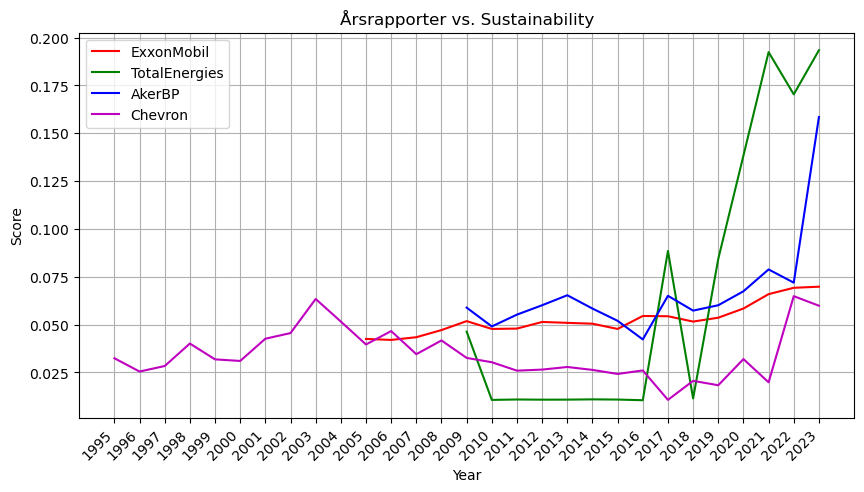

In [547]:
# Combine all years into a single list and remove duplicates
all_years = sorted(set(years['Exxon'] + years['TotalEnergies'] + years['AkerBP'] + years['Chevron']))

# Define the colors and labels for each company
colors = ['r', 'g', 'b', 'm']
labels = ["ExxonMobil", "TotalEnergies", "AkerBP", "Chevron"]

plt.figure(figsize=(10, 5))
plt.title(f'Årsrapporter vs. Sustainability')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)

# Plot the scores for each company
for i, company in enumerate(plot_data.keys()):
    plt.plot(years[company], plot_data[company], color=colors[i], label=labels[i])

# Customize x-axis ticks to show all years
plt.xticks(all_years, rotation=45, ha='right')

# Show legend
plt.legend()

# Show the plot
plt.show()

## 2) Empirisk data

### Exxon årsrapporter

In [5]:
with open("Exxon_pdfs.pkl","rb") as file: ## husk at dette er en dictionary 2005-2023
    exxon_pdfs = pickle.load(file)

exxon_pdfs = list(exxon_pdfs.values())

exxon_mean_embeddings1 = np.stack([emb.mean(dim=0).numpy() for emb in exxon_pdfs])

In [6]:
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

In [7]:
# Centroid: Ordet vi sammenlikner med

centroid = "Sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).cpu().numpy().reshape(1, -1)

print(centroid_embedding.shape)

(1, 1024)


In [8]:
# Gir embeddingene en score basert på avstand til centroid-ordet

def embedding_score(mean_embeddings, centroid_embedding,alpha):
    distances = sc.spatial.distance.cdist(mean_embeddings, centroid_embedding, "cosine").flatten()
    score = 1/(distances**alpha)
    sum = score.sum()
    return score/sum

In [10]:
exxon_scores1 = embedding_score(exxon_mean_embeddings1, centroid_embedding, 1)

print(exxon_scores1)

[0.05051213 0.05038785 0.0507241  0.05156872 0.05255372 0.05169713
 0.05173765 0.052465   0.05236892 0.05227733 0.05169638 0.05308666
 0.05306219 0.05250472 0.05291154 0.05382601 0.05514667 0.05568995
 0.05578332]


In [12]:
#https://www.statista.com/statistics/531354/greenhouse-gas-emissions-from-exxon-mobil-worldwide/

exxon_emissions1 = [136, 139, 135, 126, 123, 126, 128, 126, 127, 124, 122, 124, 121, 125, 123, 115, 118, 113, 111]

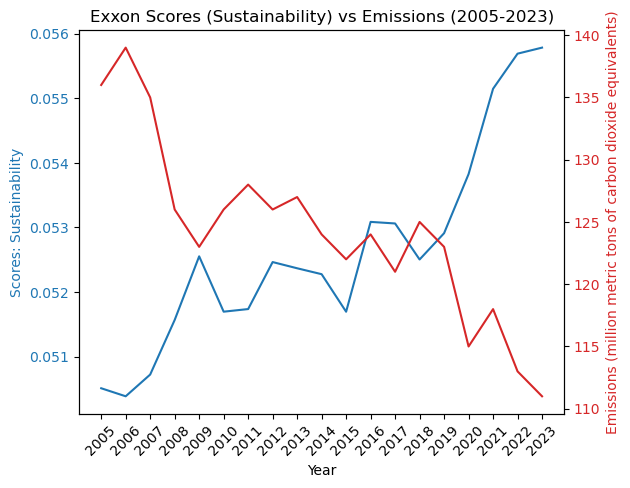

In [22]:
years = list(range(2005, 2024))

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel(f'Scores: {centroid}', color=color)
ax1.plot(years, exxon_scores1, color=color, label=f'Scores: {centroid}')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Emissions (million metric tons of carbon dioxide equivalents)', color=color)  # we already handled the x-label with ax1
ax2.plot(years, exxon_emissions1, color=color, label='Emissions (million metric tons of carbon dioxide equivalents)')
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)

fig.tight_layout()  # to make sure the labels and titles fit
plt.title(f'Exxon Scores ({centroid}) vs Emissions (2005-2023)')
plt.show()

### Exxons news 

In [23]:
with open("Exxon_news_embeddings.pkl","rb") as file: ## husk at dette er en liste 2016-2024
    exxon_news = pickle.load(file)

exxon_mean_embeddings2 = np.stack([emb.mean(dim=0).numpy() for emb in exxon_news])

In [24]:
# Centroid: Ordet vi sammenlikner med

centroid = "Sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).cpu().numpy().reshape(1, -1)

print(centroid_embedding.shape)

(1, 1024)


In [30]:
exxon_scores2 = embedding_score(exxon_mean_embeddings2, centroid_embedding, 1)

print(exxon_scores2)

[0.10604784 0.10627651 0.10417373 0.10626698 0.11515548 0.11984571
 0.11711373 0.11240443 0.1127156 ]


In [32]:
#https://www.statista.com/statistics/531354/greenhouse-gas-emissions-from-exxon-mobil-worldwide/

exxon_emissions2 = [124, 121, 125, 123, 115, 118, 113, 111]

In [37]:
years = np.array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
emissions_years = np.array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
exxon_scores2 = np.array(exxon_scores2)
exxon_emissions2 = np.array(exxon_emissions2)

# Reshape the data for linear regression
emissions_years = emissions_years.reshape(-1, 1)
exxon_emissions2 = exxon_emissions2.reshape(-1, 1)

# Create a linear regression model and fit it to the data
regression = LinearRegression()
regression.fit(emissions_years, exxon_emissions2)

# Predict the emissions for 2024
predicted_emissions_2024 = regression.predict(np.array([[2024]]))
print(f"Predicted emissions for 2024: {predicted_emissions_2024[0][0]}")

# Add the predicted value to the emissions array
emissions_years = np.append(emissions_years, [[2024]], axis=0)
exxon_emissions2 = np.append(exxon_emissions2, predicted_emissions_2024, axis=0)

Predicted emissions for 2024: 110.17857142857156


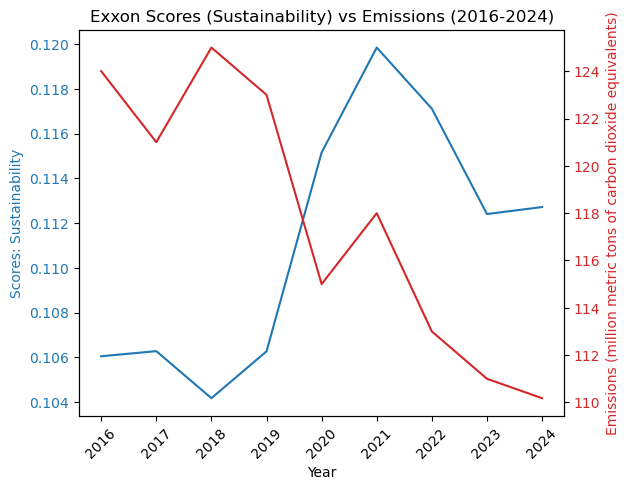

In [43]:
fig, ax1 = plt.subplots()

# Plot the company scores
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel(f'Scores: {centroid}', color=color)
ax1.plot(years, exxon_scores2, color=color, label=f'Scores: {centroid}')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis to plot the emissions
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Emissions (million metric tons of carbon dioxide equivalents)', color=color)
ax2.plot(emissions_years, exxon_emissions2, color=color, label='Emissions')
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis ticks to be whole years and rotate
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)

# Title and layout adjustments
fig.tight_layout()
plt.title(f'Exxon Scores ({centroid}) vs Emissions (2016-2024)')
plt.show()

### Ulike selskaper 2024

In [92]:
# Centroid: Ordet vi sammenlikner med

centroid = "Sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).cpu().numpy().reshape(1, -1)

print(centroid_embedding.shape)

(1, 1024)


In [85]:
#Exxon

with open("Exxon_news_embeddings.pkl","rb") as file: ## husk at dette er en liste 2016-2024
    exxon = pickle.load(file)

exxon_2024 = exxon[-1]

mean_exxon = exxon_2024.mean(dim=0).numpy()


In [86]:
#TotalEnergies

with open("totalenergies_newsembeddings_2015_2024.pickle", "rb") as file: ## husk at dett er en liste 2015-2024
    totalEnergies = pickle.load(file)

totalEnergies_2024 = totalEnergies[-1]

mean_totalEnergies = totalEnergies_2024.mean(dim=0).numpy()

In [87]:
#AkerBP

with open("AkerBP_news_embeddings.pkl", "rb") as file: ## husk at dette er en liste 2016-2024
    akerBP = pickle.load(file)

akerBP_2024 = akerBP[-1]

mean_akerBP = akerBP_2024.mean(dim=0).numpy()

In [88]:
embeddings_2024 = [mean_exxon, mean_totalEnergies, mean_akerBP]
print(embeddings_2024)

[array([-0.24218343,  0.52749103,  0.07972469, ..., -0.6482674 ,
       -0.38613802,  0.06073271], dtype=float32), array([-0.21304858,  0.5763211 , -0.40060034, ..., -0.3234527 ,
        0.09692641, -0.07872039], dtype=float32), array([ 0.49007818,  0.63084036, -0.02246108, ..., -0.8651808 ,
       -0.49745318,  0.38556156], dtype=float32)]


In [93]:
scores = embedding_score(embeddings_2024, centroid_embedding, 1)

print(scores)

[0.28722671 0.40779141 0.30498188]


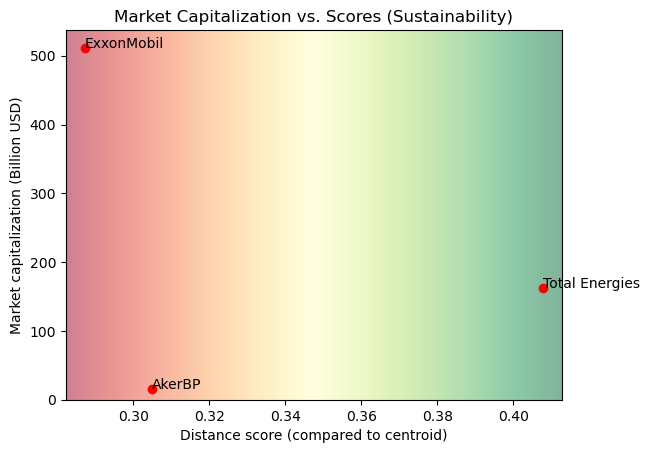

In [96]:
fig, ax = plt.subplots()

labels = ["ExxonMobil", "Total Energies", "AkerBP"]

# Define the gradient
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient background directly on the axes
ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap('RdYlGn'), alpha=0.5, extent=[0, 1, 0, 1], transform=ax.transAxes)

# Customize the plot
plt.xlim(min(scores) - 0.005, max(scores) + 0.005)

ax.set_facecolor('none')

# Plot the data
plt.plot(scores,[511.62,162.11, 15.52],"ro")

for i, label in enumerate(labels):
    plt.text(scores[i], [511.62,162.11,15.52][i], label, fontsize=10, ha='left')

plt.xlabel("Distance score (compared to centroid)")
plt.ylabel("Market capitalization (Billion USD)")

plt.title(f'Market Capitalization vs. Scores ({centroid})')
plt.show()

## 3) Typer tekster

### ExxonMobil

In [412]:
# Average the embeddings for each year, SNITT-TEKSTEN
# tar gjennomsnittet av hver akse for å finne én representativ vektor
def snitt(embeddings):
  snitt = [emb.mean(dim=0).numpy() for emb in embeddings]
  return snitt

In [413]:
with open('Exxon_news_embeddings.pkl', 'rb') as file:
    exxon_news = pickle.load(file)

exxon_news = snitt(exxon_news)
print(f"Exxon news ({len(exxon_news)}): {exxon_news}")


with open("Exxon_pdfs.pkl", "rb") as file:
    exxon_pdfs = pickle.load(file)

exxon_pdfs = snitt(list(exxon_pdfs.values()))
print(f"Exxon pdfs ({len(exxon_pdfs)}): {exxon_pdfs}")

Exxon news (9): [array([-0.24312055,  0.5051784 ,  0.1549819 , ..., -0.6929625 ,
       -0.24416393,  0.20473239], dtype=float32), array([-0.29078484,  0.5914777 ,  0.13950814, ..., -0.7001572 ,
       -0.25072357,  0.20023325], dtype=float32), array([-0.20187528,  0.6276899 ,  0.10301138, ..., -0.74484354,
       -0.26047188,  0.18062863], dtype=float32), array([-0.24780482,  0.5994666 ,  0.07525771, ..., -0.7720047 ,
       -0.2908926 ,  0.16564277], dtype=float32), array([-0.22474691,  0.5233269 , -0.01631049, ..., -0.7311823 ,
       -0.29212835,  0.04337287], dtype=float32), array([-0.23074628,  0.52626956,  0.08668005, ..., -0.7644288 ,
       -0.36406428,  0.02450266], dtype=float32), array([-0.26597995,  0.5513826 ,  0.03799932, ..., -0.81161195,
       -0.4229434 ,  0.01807259], dtype=float32), array([-0.29241958,  0.46201125,  0.14774753, ..., -0.61416876,
       -0.35401216,  0.04904832], dtype=float32), array([-0.24218343,  0.52749103,  0.07972469, ..., -0.6482674 ,
       

In [414]:
print(exxon_pdfs)

[array([-0.22781669,  0.38537815,  0.19508766, ..., -0.53855574,
       -0.11800872,  0.02399045], dtype=float32), array([-0.30487993,  0.41544023,  0.2648207 , ..., -0.5337237 ,
       -0.09432547,  0.06944883], dtype=float32), array([-0.3451626 ,  0.35419983,  0.28743222, ..., -0.5534892 ,
       -0.0566364 ,  0.03825697], dtype=float32), array([-0.34910408,  0.38831043,  0.27330124, ..., -0.5279413 ,
       -0.1300687 ,  0.10858613], dtype=float32), array([-0.17983247,  0.3928511 ,  0.2291526 , ..., -0.5959525 ,
       -0.18422541,  0.07356749], dtype=float32), array([-0.24974872,  0.44549093,  0.16161783, ..., -0.55117375,
       -0.16703561,  0.09680172], dtype=float32), array([-0.17487592,  0.3465895 , -0.00360052, ..., -0.55172074,
       -0.07655721,  0.03829744], dtype=float32), array([-0.26372355,  0.2914685 ,  0.06161993, ..., -0.56271505,
       -0.08845039,  0.08164842], dtype=float32), array([-0.20515424,  0.22020929,  0.05750237, ..., -0.53925914,
       -0.09473954,  0.

In [459]:
embeddings_exxon = {}
embeddings_exxon["Exxon News"] = exxon_news
embeddings_exxon["Exxon Annual Reports"] = exxon_pdfs

embeddings_exxon

{'Exxon News': [array([-0.24312055,  0.5051784 ,  0.1549819 , ..., -0.6929625 ,
         -0.24416393,  0.20473239], dtype=float32),
  array([-0.29078484,  0.5914777 ,  0.13950814, ..., -0.7001572 ,
         -0.25072357,  0.20023325], dtype=float32),
  array([-0.20187528,  0.6276899 ,  0.10301138, ..., -0.74484354,
         -0.26047188,  0.18062863], dtype=float32),
  array([-0.24780482,  0.5994666 ,  0.07525771, ..., -0.7720047 ,
         -0.2908926 ,  0.16564277], dtype=float32),
  array([-0.22474691,  0.5233269 , -0.01631049, ..., -0.7311823 ,
         -0.29212835,  0.04337287], dtype=float32),
  array([-0.23074628,  0.52626956,  0.08668005, ..., -0.7644288 ,
         -0.36406428,  0.02450266], dtype=float32),
  array([-0.26597995,  0.5513826 ,  0.03799932, ..., -0.81161195,
         -0.4229434 ,  0.01807259], dtype=float32),
  array([-0.29241958,  0.46201125,  0.14774753, ..., -0.61416876,
         -0.35401216,  0.04904832], dtype=float32),
  array([-0.24218343,  0.52749103,  0.0797

In [460]:
# Centroid: Ordet vi sammenlikner med
centroid = "Sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.2970,  1.0930, -0.6076,  ..., -0.5267,  0.2391,  0.0083]])

In [461]:
# Gir embeddingene en score basert på avstand til centroid-ordet

def embedding_score(mean_embeddings, centroid_embedding,alpha):
    distances = sc.spatial.distance.cdist(mean_embeddings, centroid_embedding, "cosine").flatten()
    score = 1/(distances**alpha)
    sum = score.sum()
    return score/sum

In [462]:
# Compute the scores for each type
alpha = 5
scores = {}
for company, emb_list in embeddings_exxon.items():
    scores[company] = embedding_score(emb_list, centroid_embedding, alpha).tolist()
    
scores

{'Exxon News': [0.08601454772322395,
  0.08694591668600507,
  0.07867809629284847,
  0.08690697574380599,
  0.12986316733041997,
  0.15855330296978065,
  0.14128687984349922,
  0.11507474319514398,
  0.11667637021527263],
 'Exxon Annual Reports': [0.04248660679019637,
  0.04196650984749992,
  0.04338557990948024,
  0.04712002646231342,
  0.05179537237957692,
  0.04770959457881801,
  0.04789686909401537,
  0.05135966568689127,
  0.05089110191330832,
  0.05044760684940886,
  0.04770613806860777,
  0.05447542363077942,
  0.05435001601633522,
  0.05155438061022478,
  0.05358283437830289,
  0.05837602643766159,
  0.06589768126218956,
  0.06920821342841943,
  0.06979035265597049]}

In [463]:
# Define the years for each company
years_exxon = {
    'Exxon News': list(range(2016, 2025)),
    'Exxon Annual Reports': list(range(2005, 2024))
}

# Prepare data for plotting
plot_data_exxon = {
    'Exxon News': scores['Exxon News'],
    'Exxon Annual Reports': scores['Exxon Annual Reports']
}

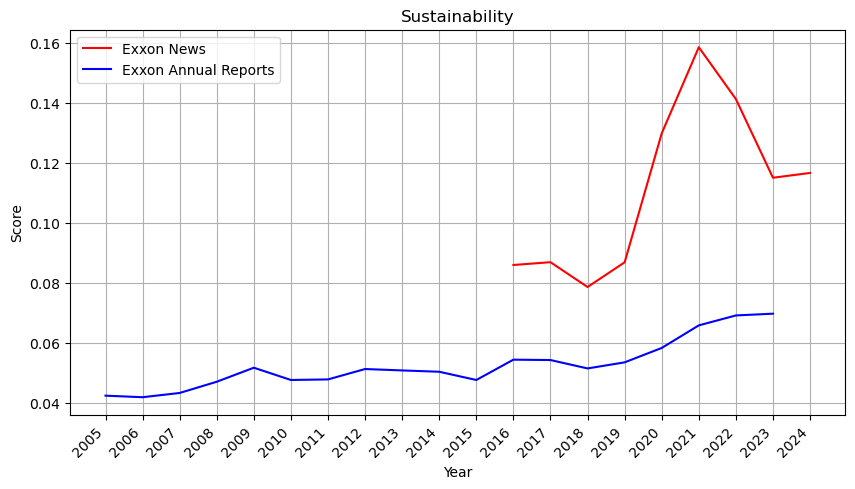

In [466]:
# Combine all years into a single list and remove duplicates
all_years_exxon = sorted(set(years_exxon['Exxon News'] + years_exxon['Exxon Annual Reports']))

# Define the colors and labels for each company
colors = ['r','b']
labels = ["Exxon News", "Exxon Annual Reports"]

plt.figure(figsize=(10, 5))
plt.title(f'{centroid}')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)

# Plot the scores for each company
for i, company in enumerate(plot_data_exxon.keys()):
    plt.plot(years_exxon[company], plot_data_exxon[company], color=colors[i], label=labels[i])

# Customize x-axis ticks to show all years
plt.xticks(all_years_exxon, rotation=45, ha='right')

# Show legend
plt.legend()

# Show the plot
plt.show()

### AkerBP

In [421]:
def snitt(embeddings):
  snitt = [emb.mean(dim=0).numpy() for emb in embeddings]
  return snitt

In [422]:
with open('AkerBP_news_embeddings.pkl', 'rb') as file:
    akerBP_news = pickle.load(file)

print(akerBP_news[0])

akerBP_news = snitt(akerBP_news)
print(f"AkerBP news ({len(akerBP_news)}): {akerBP_news}")



tensor([[-3.0456e-01,  9.5785e-01,  1.3594e-01,  ..., -1.3340e+00,
          4.5302e-01,  3.8307e-01],
        [ 5.8445e-01,  4.7834e-01, -3.7462e-01,  ..., -1.1840e+00,
         -3.3869e-01, -3.3566e-01],
        [ 2.4996e-01,  1.7104e-01, -1.3151e-01,  ..., -1.2424e+00,
         -8.2920e-01,  6.7384e-01],
        ...,
        [ 4.8273e-01,  9.5063e-01, -4.3399e-01,  ..., -1.0992e+00,
         -2.8843e-01,  2.6791e-01],
        [ 5.3550e-01,  4.7046e-01, -5.5552e-01,  ..., -1.3542e+00,
         -5.4839e-01,  1.5715e-01],
        [ 3.7093e-01,  8.2698e-04,  5.5914e-01,  ..., -7.0325e-01,
         -1.0025e+00,  5.5092e-01]])
AkerBP news (9): [array([ 0.34267336,  0.58903885, -0.04372702, ..., -1.0807465 ,
       -0.57759476,  0.2693308 ], dtype=float32), array([ 0.2573317 ,  0.39258513, -0.1900722 , ..., -1.1565386 ,
       -0.5862084 ,  0.17565815], dtype=float32), array([ 0.21637367,  0.27790096, -0.1462012 , ..., -1.114886  ,
       -0.70084953,  0.24041098], dtype=float32), array([ 

In [423]:
# Define the snitt function
def snitt(embeddings):
    # Ensure all embeddings are tensors
    tensor_embeddings = [torch.tensor(emb) for emb in embeddings]
    # Stack the tensors and compute the mean along the first dimension
    snitt = torch.stack(tensor_embeddings).mean(dim=0)
    return snitt

In [424]:

with open("annual_AkerBP.pkl", "rb") as file:
    akerBP_pdfs = pickle.load(file)

akerBP_annual = []
for year in akerBP_pdfs:
    # Convert each embedding in the list to a PyTorch tensor and compute mean
    tensor_embeddings = [torch.tensor(emb) for emb in akerBP_pdfs[year]]
    mean = snitt(tensor_embeddings)
    akerBP_annual.append(mean)
akerBP_annual.reverse()

print(akerBP_annual[0].shape)

print(f"Aker BP pdfs ({len(akerBP_annual)}): {akerBP_annual}")

torch.Size([1024])
Aker BP pdfs (15): [tensor([ 0.4496,  0.7144,  0.0890,  ..., -1.0203, -0.5103,  0.2943]), tensor([ 0.3717,  0.5783,  0.1684,  ..., -0.9368, -0.4056,  0.2735]), tensor([ 0.4339,  0.4672,  0.0503,  ..., -0.7920, -0.3806,  0.2254]), tensor([-0.0130,  0.3270,  0.0514,  ..., -0.7376, -0.2469,  0.2719]), tensor([ 0.0053,  0.3280,  0.0918,  ..., -0.6227, -0.2649,  0.2980]), tensor([ 0.0400,  0.3700,  0.1783,  ..., -0.6663, -0.3817,  0.2949]), tensor([ 0.1662,  0.2601, -0.0888,  ..., -0.6957, -0.6634,  0.4423]), tensor([ 0.1434,  0.0996,  0.3218,  ..., -0.6920, -0.6728,  0.0150]), tensor([ 0.0056,  0.3316,  0.0505,  ..., -0.8696, -0.5513,  0.1292]), tensor([ 0.0896,  0.2809,  0.0614,  ..., -0.9446, -0.6048,  0.1295]), tensor([ 0.0772,  0.2754,  0.0418,  ..., -0.8781, -0.6591,  0.1122]), tensor([ 0.1263,  0.2631, -0.0113,  ..., -0.8838, -0.6215,  0.0877]), tensor([ 0.0964,  0.2723, -0.0264,  ..., -0.8215, -0.5835,  0.0910]), tensor([ 0.0360,  0.2449,  0.0097,  ..., -0.7858, -

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57593/2735540684.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [444]:
embeddings_aker = {}
embeddings_aker["AkerBP News"] = akerBP_news
embeddings_aker["AkerBP Annual Reports"] = akerBP_annual

embeddings_aker

{'AkerBP News': [array([ 0.34267336,  0.58903885, -0.04372702, ..., -1.0807465 ,
         -0.57759476,  0.2693308 ], dtype=float32),
  array([ 0.2573317 ,  0.39258513, -0.1900722 , ..., -1.1565386 ,
         -0.5862084 ,  0.17565815], dtype=float32),
  array([ 0.21637367,  0.27790096, -0.1462012 , ..., -1.114886  ,
         -0.70084953,  0.24041098], dtype=float32),
  array([ 0.3084579 ,  0.52573806, -0.23526993, ..., -1.1351568 ,
         -0.4362622 ,  0.37928843], dtype=float32),
  array([ 0.3581431 ,  0.43783376, -0.2686381 , ..., -1.116644  ,
         -0.544963  ,  0.21410924], dtype=float32),
  array([ 0.3094682 ,  0.54865134, -0.15052861, ..., -1.0879618 ,
         -0.4746925 ,  0.24485879], dtype=float32),
  array([ 0.22245272,  0.4727047 , -0.35373348, ..., -0.89436203,
         -0.38583446,  0.2845176 ], dtype=float32),
  array([ 0.3404096 ,  0.5370492 , -0.17731668, ..., -0.99929506,
         -0.39034832,  0.22795507], dtype=float32),
  array([ 0.49007818,  0.63084036, -0.022

In [426]:
# Centroid: Ordet vi sammenlikner med
centroid = "Sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.2970,  1.0930, -0.6076,  ..., -0.5267,  0.2391,  0.0083]])

In [453]:
# Compute the scores for each type
alpha = 5
scores_aker = {}
for company, emb_list in embeddings_aker.items():
    # Ensure emb_list is a numpy array with consistent shape
    emb_list_np = np.vstack(emb_list)
    scores_aker[company] = embedding_score(emb_list_np, centroid_embedding, alpha).tolist()
    
scores

{'AkerBP News': [0.06540684279312063,
  0.07286727968538637,
  0.0802741552074749,
  0.10604961113554337,
  0.08421334829557903,
  0.15398543373673143,
  0.13769194827731715,
  0.16887216146541686,
  0.1306392194034302],
 'AkerBP Annual Reports': [0.0588455162945184,
  0.04900998083023053,
  0.05519721148541733,
  0.06009778202906264,
  0.06532658298651496,
  0.0583558378116094,
  0.05194571663882499,
  0.04223300034685742,
  0.06503075612012091,
  0.057286653111638816,
  0.06009829666516416,
  0.06739720989387926,
  0.07881029445783193,
  0.07189893942303277,
  0.1584662219052965]}

In [454]:
# Define the years for each company
years_aker = {
    'AkerBP News': list(range(2016, 2025)),
    'AkerBP Annual Reports': list(range(2009, 2024))
}

# Prepare data for plotting
plot_data_aker = {
    'AkerBP News': scores_aker['AkerBP News'],
    'AkerBP Annual Reports': scores_aker['AkerBP Annual Reports']
}

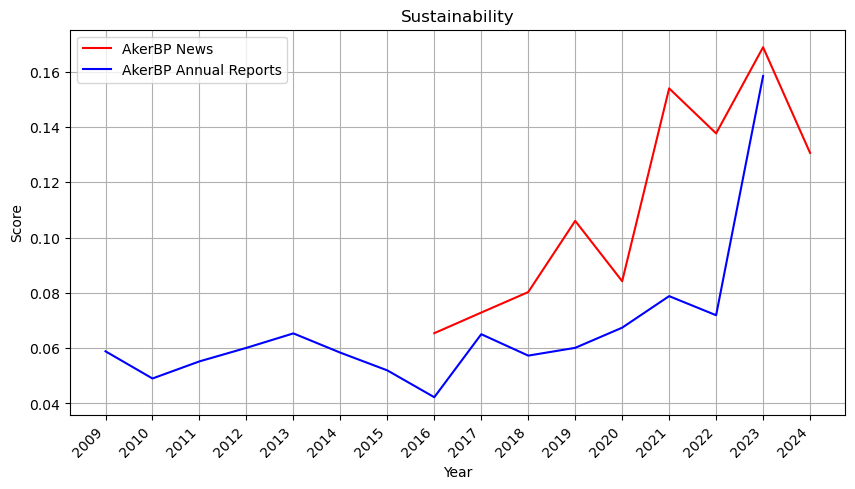

In [457]:
# Combine all years into a single list and remove duplicates
all_years_aker = sorted(set(years_aker['AkerBP News'] + years_aker['AkerBP Annual Reports']))

# Define the colors and labels for each company
colors = ['r','b']
labels = ["AkerBP News", "AkerBP Annual Reports"]

plt.figure(figsize=(10, 5))
plt.title(f'{centroid}')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)

# Plot the scores for each company
for i, company in enumerate(plot_data_aker.keys()):
    plt.plot(years_aker[company], plot_data_aker[company], color=colors[i], label=labels[i])

# Customize x-axis ticks to show all years
plt.xticks(all_years_aker, rotation=45, ha='right')

# Show legend
plt.legend()

# Show the plot
plt.show()

### TotalEnergies

In [430]:
def snitt(embeddings):
  snitt = [emb.mean(dim=0).numpy() for emb in embeddings]
  return snitt

In [431]:
with open("totalenergies_newsembeddings_2015_2024.pickle", "rb") as file: ## husk at dette er en liste 2015-2024
    totalEnergies_news = pickle.load(file)

totalEnergies_news = snitt(totalEnergies_news)
print(f"AkerBP news ({len(totalEnergies_news)}): {totalEnergies_news}")


AkerBP news (10): [array([-0.04135138,  0.7218397 , -0.04414669, ..., -0.23318239,
        0.17626308,  0.03602049], dtype=float32), array([-0.18794447,  0.5433031 , -0.3201899 , ..., -0.29937813,
        0.21399568,  0.06335741], dtype=float32), array([ 0.07606629,  0.4995294 , -0.20137684, ..., -0.3297443 ,
        0.11223628,  0.16347477], dtype=float32), array([-0.18931998,  0.5251537 , -0.21074122, ..., -0.40925866,
        0.00245002,  0.04477068], dtype=float32), array([-0.12864353,  0.5432309 , -0.41699278, ..., -0.2743    ,
        0.2644349 ,  0.3001077 ], dtype=float32), array([-0.12654464,  0.48453233, -0.47715136, ..., -0.27173695,
       -0.00150779,  0.07591252], dtype=float32), array([-0.17133111,  0.569401  , -0.5499726 , ..., -0.41587505,
        0.06794162, -0.02545478], dtype=float32), array([-0.30374825,  0.49028638, -0.42402983, ..., -0.41798753,
       -0.0138607 , -0.07077897], dtype=float32), array([-0.17713709,  0.5844908 , -0.3734641 , ..., -0.39524868,
     

In [432]:
def snitt(embeddings):
    tensor_embeddings = [torch.tensor(emb) for emb in embeddings]
    snitt = torch.stack(tensor_embeddings).mean(dim=0)
    return snitt

with open("annual_totalenergies.pkl", "rb") as file:
    totalEnergies_pdfs = pickle.load(file)

for year in totalEnergies_pdfs:
    print(year)

totalEnergies_annual = []
for year in akerBP_pdfs:
    # Convert each embedding in the list to a PyTorch tensor and compute mean
    tensor_embeddings = [torch.tensor(emb) for emb in totalEnergies_pdfs[year]]
    mean = snitt(tensor_embeddings)
    totalEnergies_annual.append(mean)
totalEnergies_annual.reverse()
    
print(f"TotalEnergies pdfs ({len(totalEnergies_annual)}): {totalEnergies_annual}")


2023
2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
TotalEnergies pdfs (15): [tensor([-0.0928,  0.5179,  0.0333,  ..., -0.5023, -0.0854,  0.1075]), tensor([-0.0957, -0.6846, -0.0909,  ...,  0.0758, -0.1351, -0.0555]), tensor([-0.0980, -0.6837, -0.0977,  ...,  0.0771, -0.1374, -0.0559]), tensor([-0.1035, -0.6897, -0.0948,  ...,  0.0747, -0.1378, -0.0541]), tensor([-0.0985, -0.6863, -0.0904,  ...,  0.0773, -0.1358, -0.0558]), tensor([-0.1001, -0.6812, -0.0886,  ...,  0.0754, -0.1362, -0.0523]), tensor([-0.0962, -0.6863, -0.0904,  ...,  0.0698, -0.1389, -0.0529]), tensor([-0.0988, -0.6935, -0.1059,  ...,  0.0806, -0.1365, -0.0457]), tensor([-0.2602,  0.4919, -0.1675,  ..., -0.4459,  0.0448,  0.1436]), tensor([-0.1031, -0.6671, -0.1342,  ...,  0.0303, -0.1158, -0.0339]), tensor([-0.3035,  0.3979, -0.1686,  ..., -0.4692, -0.0320,  0.1014]), tensor([-0.2963,  0.4559, -0.1402,  ..., -0.5181,  0.0902,  0.0831]), tensor([-0.3209,  0.6182, -0.1313,  ..., -0.

/var/folders/jj/d77tn1s96j9dgz5sx1cf0b500000gn/T/ipykernel_57593/2269643773.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [467]:
embeddings_total = {}
embeddings_total["TotalEnergies News"] = totalEnergies_news
embeddings_total["TotalEnergies Annual Reports"] = totalEnergies_annual

embeddings

{'TotalEnergies News': [array([-0.04135138,  0.7218397 , -0.04414669, ..., -0.23318239,
          0.17626308,  0.03602049], dtype=float32),
  array([-0.18794447,  0.5433031 , -0.3201899 , ..., -0.29937813,
          0.21399568,  0.06335741], dtype=float32),
  array([ 0.07606629,  0.4995294 , -0.20137684, ..., -0.3297443 ,
          0.11223628,  0.16347477], dtype=float32),
  array([-0.18931998,  0.5251537 , -0.21074122, ..., -0.40925866,
          0.00245002,  0.04477068], dtype=float32),
  array([-0.12864353,  0.5432309 , -0.41699278, ..., -0.2743    ,
          0.2644349 ,  0.3001077 ], dtype=float32),
  array([-0.12654464,  0.48453233, -0.47715136, ..., -0.27173695,
         -0.00150779,  0.07591252], dtype=float32),
  array([-0.17133111,  0.569401  , -0.5499726 , ..., -0.41587505,
          0.06794162, -0.02545478], dtype=float32),
  array([-0.30374825,  0.49028638, -0.42402983, ..., -0.41798753,
         -0.0138607 , -0.07077897], dtype=float32),
  array([-0.17713709,  0.5844908 ,

In [434]:
# Centroid: Ordet vi sammenlikner med
centroid = "Sustainability"
centroid_embedding = model.encode(centroid, convert_to_tensor=True).reshape(1, -1)
centroid_embedding

tensor([[-0.2970,  1.0930, -0.6076,  ..., -0.5267,  0.2391,  0.0083]])

In [468]:
# Compute the scores for each type
alpha = 5
scores_total = {}
for company, emb_list in embeddings.items():
    # Ensure emb_list is a numpy array with consistent shape
    emb_list_np = np.vstack(emb_list)
    scores_total[company] = embedding_score(emb_list_np, centroid_embedding, alpha).tolist()
    
scores

{'Exxon News': [0.08601454772322395,
  0.08694591668600507,
  0.07867809629284847,
  0.08690697574380599,
  0.12986316733041997,
  0.15855330296978065,
  0.14128687984349922,
  0.11507474319514398,
  0.11667637021527263],
 'Exxon Annual Reports': [0.04248660679019637,
  0.04196650984749992,
  0.04338557990948024,
  0.04712002646231342,
  0.05179537237957692,
  0.04770959457881801,
  0.04789686909401537,
  0.05135966568689127,
  0.05089110191330832,
  0.05044760684940886,
  0.04770613806860777,
  0.05447542363077942,
  0.05435001601633522,
  0.05155438061022478,
  0.05358283437830289,
  0.05837602643766159,
  0.06589768126218956,
  0.06920821342841943,
  0.06979035265597049]}

In [469]:
# Define the years for each company
years_total = {
    'TotalEnergies News': list(range(2015, 2025)),
    'TotalEnergies Annual Reports': list(range(2008, 2023)) ## finn ut av hvilke år det egentlig er, for dette kan ikke være riktig 
}

# Prepare data for plotting
plot_data_total = {
    'TotalEnergies News': scores_total['TotalEnergies News'],
    'TotalEnergies Annual Reports': scores_total['TotalEnergies Annual Reports']
}

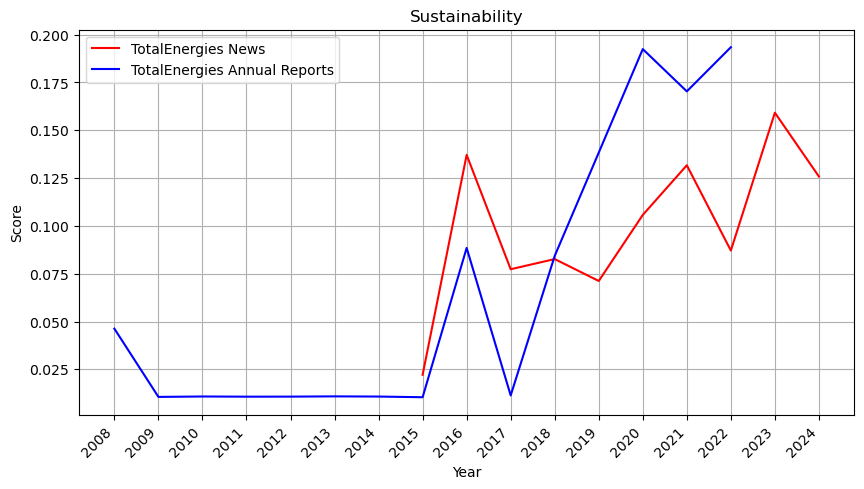

In [470]:
# Combine all years into a single list and remove duplicates
all_years_total = sorted(set(years_total['TotalEnergies News'] + years_total['TotalEnergies Annual Reports']))

# Define the colors and labels for each company
colors = ['r','b']
labels = ["TotalEnergies News", "TotalEnergies Annual Reports"]

plt.figure(figsize=(10, 5))
plt.title(f'{centroid}')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)

# Plot the scores for each company
for i, company in enumerate(plot_data_total.keys()):
    plt.plot(years_total[company], plot_data_total[company], color=colors[i], label=labels[i])

# Customize x-axis ticks to show all years
plt.xticks(all_years_total, rotation=45, ha='right')

# Show legend
plt.legend()

# Show the plot
plt.show()

### BP

### Equinor

In [374]:
# Define the snitt function
def snitt(embeddings):
    # Ensure all embeddings are tensors
    tensor_embeddings = [torch.tensor(emb) for emb in embeddings]
    # Stack the tensors and compute the mean along the first dimension
    snitt = torch.stack(tensor_embeddings).mean(dim=0)
    return snitt

In [381]:
with open('Equinor-news.pkl', 'rb') as file:
    equinor_news = pickle.load(file)

print(equinor_news)

equinor_news = snitt(equinor_news[0])
print(f"Equinor news ({len(equinor_news)}): {equinor_news}")



(array([[-0.05696804,  0.56841576, -0.11713785, ..., -0.9622079 ,
        -0.36495858,  0.30451107],
       [ 0.4621681 ,  0.7124936 ,  0.15309218, ..., -0.5934797 ,
        -0.285895  , -0.15139847],
       [ 0.31837276,  0.73439777, -0.27518985, ..., -0.5748835 ,
        -0.5520443 , -0.05690349],
       ...,
       [-0.18530944, -0.42313737, -0.06613363, ..., -0.588627  ,
        -0.8120193 ,  0.11150603],
       [ 0.75661474,  0.4974343 , -0.5249924 , ..., -0.64854646,
        -0.28418136,  0.01787356],
       [ 0.29137093,  0.7069838 ,  0.10968315, ..., -0.8700328 ,
        -0.7040263 ,  0.33398578]], dtype=float32), ['2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '

### Alle

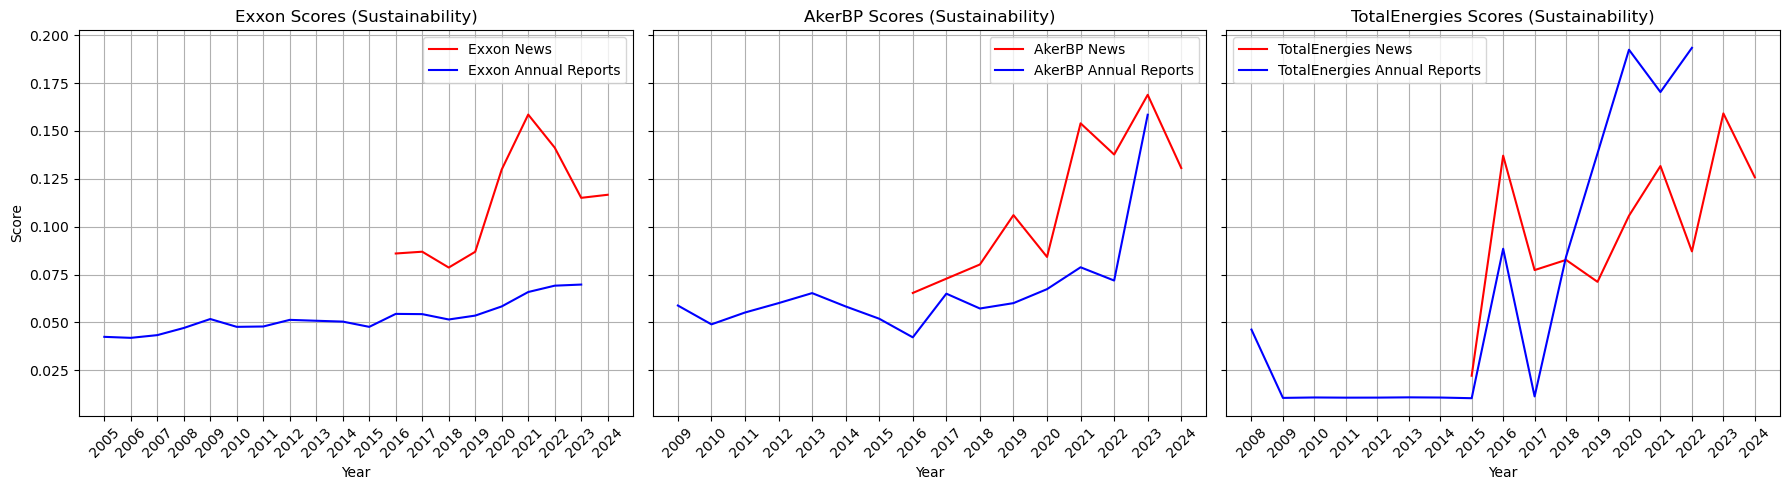

In [476]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Exxon
axs[0].set_title(f'Exxon Scores ({centroid})')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Score')
axs[0].grid(True)
for i, company in enumerate(plot_data_exxon.keys()):
    axs[0].plot(years_exxon[company], plot_data_exxon[company], color=['r', 'b'][i], label=company)
axs[0].set_xticks(all_years_exxon)
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)

# AkerBP
axs[1].set_title(f'AkerBP Scores ({centroid})')
axs[1].set_xlabel('Year')
axs[1].grid(True)
for i, company in enumerate(plot_data_aker.keys()):
    axs[1].plot(years_aker[company], plot_data_aker[company], color=['r', 'b'][i], label=company)
axs[1].set_xticks(all_years_aker)
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# TotalEnergies
axs[2].set_title(f'TotalEnergies Scores ({centroid})')
axs[2].set_xlabel('Year')
axs[2].grid(True)
for i, company in enumerate(plot_data_total.keys()):
    axs[2].plot(years_total[company], plot_data_total[company], color=['r', 'b'][i], label=company)
axs[2].set_xticks(all_years_total)
axs[2].legend()
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# 4) Hvordan snakker selskapene om bærekraft?

## ExxonMobil

In [324]:
## funksjoner for fire centroids

## funksjon for centroide embeddings
def centroid_embeddings(centroid_1, centroid_2, centroid_3,centroid_4):
    centroid_embedding_1 = model.encode(centroid_1, convert_to_tensor=True).reshape(1, -1)
    centroid_embedding_2 = model.encode(centroid_2, convert_to_tensor=True).reshape(1, -1)
    centroid_embedding_3 = model.encode(centroid_3, convert_to_tensor=True).reshape(1, -1)
    centroid_embedding_4 = model.encode(centroid_4, convert_to_tensor=True).reshape(1, -1)

    centroid_embeddings = [centroid_embedding_1, centroid_embedding_2, centroid_embedding_3, centroid_embedding_4]
    centroid_embeddings = np.array(centroid_embeddings)
    centroid_embeddings = np.squeeze(centroid_embeddings)

    return centroid_embeddings


## funksjon for embedding score
def embedding_score(text_embeddings, centroid_embeddings, alpha):

    # Calculating distances using scipy.spatial.distance.cdist function
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
    distances = sc.spatial.distance.cdist(text_embeddings, centroid_embeddings, metric="cosine")

    # Scale and invert the distances according to the specified scaling
    score = 1/(distances**alpha)

    # L1 norm the scores to get a probability distribution
    score /= score.sum(axis=1)[:,None]

    return score

## gir ut gjennomsnittlig fokus på trend
def mean_score(scores):      # tar inn scores
    mean_1=np.mean(scores[:,0])
    mean_2=np.mean(scores[:,1])
    mean_3=np.mean(scores[:,2])
    mean_4=np.mean(scores[:,3])

    embedding_scores=[mean_1,mean_2,mean_3,mean_4]
    return embedding_scores

In [330]:
def snitt(embeddings):
  snitt = [emb.mean(dim=0).numpy() for emb in embeddings]
  return snitt

with open('Exxon_news_embeddings.pkl', 'rb') as file:
    exxon_news = pickle.load(file)

exxon_news = snitt(exxon_news)
print(f"Exxon news ({len(exxon_news)}): {exxon_news}")

exxon_news = [emb.reshape(1, -1) for emb in exxon_news]


Exxon news (9): [array([-0.24312055,  0.5051784 ,  0.1549819 , ..., -0.6929625 ,
       -0.24416393,  0.20473239], dtype=float32), array([-0.29078484,  0.5914777 ,  0.13950814, ..., -0.7001572 ,
       -0.25072357,  0.20023325], dtype=float32), array([-0.20187528,  0.6276899 ,  0.10301138, ..., -0.74484354,
       -0.26047188,  0.18062863], dtype=float32), array([-0.24780482,  0.5994666 ,  0.07525771, ..., -0.7720047 ,
       -0.2908926 ,  0.16564277], dtype=float32), array([-0.22474691,  0.5233269 , -0.01631049, ..., -0.7311823 ,
       -0.29212835,  0.04337287], dtype=float32), array([-0.23074628,  0.52626956,  0.08668005, ..., -0.7644288 ,
       -0.36406428,  0.02450266], dtype=float32), array([-0.26597995,  0.5513826 ,  0.03799932, ..., -0.81161195,
       -0.4229434 ,  0.01807259], dtype=float32), array([-0.29241958,  0.46201125,  0.14774753, ..., -0.61416876,
       -0.35401216,  0.04904832], dtype=float32), array([-0.24218343,  0.52749103,  0.07972469, ..., -0.6482674 ,
       

In [331]:
print(exxon_news[0].shape)

(1, 1024)


In [332]:
centroid1= "We believes that technology has been the proven answer, and we have the opportunity to continue to use technology to drive down emissions."
centroid2= "Our core business of delivering energy to the world contributes directly to: Goal 7 [UN Sustainable Development Goals]: Ensure access to affordable, reliable, sustainable and modern energy for all."
centroid3= "Our sustainability goal is to maintain a 99.9 prosent compliance record, and in 2018, we achieved this record for the 6th consecutive year."
centroid4= "In addition, the company made a 3 million dollar investment in Arq technology in 2019 to advance a novel approach to coal-to-oil products that creates a very low sulfur transportation fuel."

centroids = centroid_embeddings(centroid1,centroid2,centroid3,centroid4)
alpha = 15    # an initial alpha value

centroid_1_values = []
centroid_2_values = []
centroid_3_values = []
centroid_4_values = []

for i in exxon_news:
    scores = embedding_score(i, centroids, alpha)
    mean=mean_score(scores)
    centroid_1_values.append(mean[0])
    centroid_2_values.append(mean[1])
    centroid_3_values.append(mean[2])
    centroid_4_values.append(mean[3])

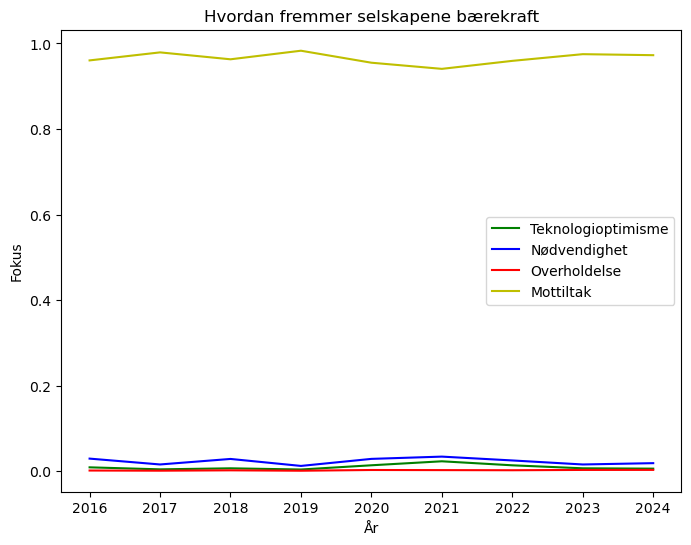

In [337]:
# lag en loop med en plot per selskap GGPLOT

years = range(2016, 2025)    # skriv inn riktig antall år

# Sett opp plot
plt.figure(figsize=(8, 6))
plt.plot(years, centroid_1_values, 'g-', label="Teknologioptimisme")
plt.plot(years, centroid_2_values, 'b-', label="Nødvendighet")
plt.plot(years, centroid_3_values, 'r-', label="Overholdelse")
plt.plot(years, centroid_4_values, 'y-', label="Mottiltak")
plt.xlabel('År')
plt.ylabel('Fokus')
plt.title('Hvordan fremmer selskapene bærekraft')

# Legg til en legend
plt.legend()

# Vis plottet
plt.show()

## GG-plot

In [366]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, facet_wrap, theme, element_rect, element_line, element_text

# Define the data for each company
years = list(range(2016, 2025))

In [349]:
## Exxon:

print(len(exxon_news))

centroid_1_values_e = []
centroid_2_values_e = []
centroid_3_values_e = []
centroid_4_values_e = []

for i in exxon_news:
    scores = embedding_score(i, centroids, alpha)
    mean=mean_score(scores)
    centroid_1_values_e.append(mean[0])
    centroid_2_values_e.append(mean[1])
    centroid_3_values_e.append(mean[2])
    centroid_4_values_e.append(mean[3])

company_a_values = {
    'centroid_1': centroid_1_values_e,
    'centroid_2': centroid_2_values_e,
    'centroid_3': centroid_3_values_e,
    'centroid_4': centroid_4_values_e
}

9


In [352]:
## AkerBP:

with open('AkerBP_news_embeddings.pkl', 'rb') as file:
    akerBP_news = pickle.load(file)

print(len(akerBP_news))

centroid_1_values_a = []
centroid_2_values_a = []
centroid_3_values_a = []
centroid_4_values_a = []

for i in akerBP_news:
    scores = embedding_score(i, centroids, alpha)
    mean=mean_score(scores)
    centroid_1_values_a.append(mean[0])
    centroid_2_values_a.append(mean[1])
    centroid_3_values_a.append(mean[2])
    centroid_4_values_a.append(mean[3])

company_b_values = {
    'centroid_1': centroid_1_values_a,
    'centroid_2': centroid_2_values_a,
    'centroid_3': centroid_3_values_a,
    'centroid_4': centroid_4_values_a
}

9


In [353]:
## TotalEnergies:

with open("totalenergies_newsembeddings_2015_2024.pickle", "rb") as file: ## husk at dette er en liste 2015-2024
    totalEnergies_news = pickle.load(file)

totalEnergies_news.pop(0)

print(len(totalEnergies_news))

centroid_1_values_t = []
centroid_2_values_t = []
centroid_3_values_t = []
centroid_4_values_t = []

for i in akerBP_news:
    scores = embedding_score(i, centroids, alpha)
    mean=mean_score(scores)
    centroid_1_values_t.append(mean[0])
    centroid_2_values_t.append(mean[1])
    centroid_3_values_t.append(mean[2])
    centroid_4_values_t.append(mean[3])

company_c_values = {
    'centroid_1': centroid_1_values_t,
    'centroid_2': centroid_2_values_t,
    'centroid_3': centroid_3_values_t,
    'centroid_4': centroid_4_values_t
}


9


In [357]:
## TotalEnergies (kopi):

""""
with open("totalenergies_newsembeddings_2015_2024.pickle", "rb") as file: ## husk at dette er en liste 2015-2024
    totalEnergies_news = pickle.load(file)

totalEnergies_news.pop(0)

print(len(totalEnergies_news))

centroid_1_values_t = []
centroid_2_values_t = []
centroid_3_values_t = []
centroid_4_values_t = []

for i in akerBP_news:
    scores = embedding_score(i, centroids, alpha)
    mean=mean_score(scores)
    centroid_1_values_t.append(mean[0])
    centroid_2_values_t.append(mean[1])
    centroid_3_values_t.append(mean[2])
    centroid_4_values_t.append(mean[3])

"""

company_d_values = {
    'centroid_1': centroid_1_values_t,
    'centroid_2': centroid_2_values_t,
    'centroid_3': centroid_3_values_t,
    'centroid_4': centroid_4_values_t
}

print(len(totalEnergies_news))


9


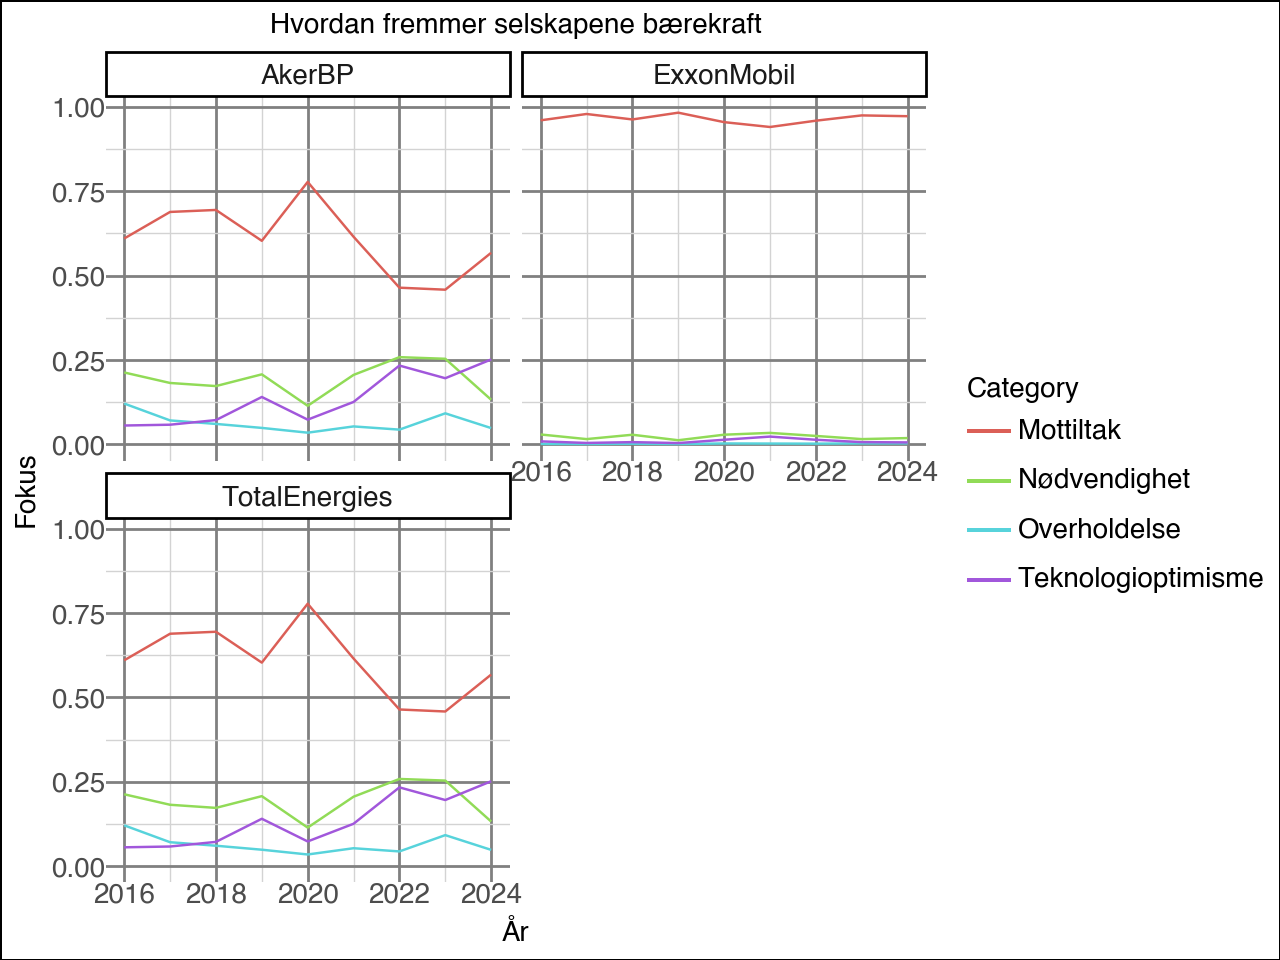

In [369]:
# Sample data for illustration
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Provided data for companies
# Assuming the lists are filled with actual data
company_a_values = {'centroid_1': centroid_1_values_e, 'centroid_2': centroid_2_values_e, 'centroid_3': centroid_3_values_e, 'centroid_4': centroid_4_values_e}
company_b_values = {'centroid_1': centroid_1_values_a, 'centroid_2': centroid_2_values_a, 'centroid_3': centroid_3_values_a, 'centroid_4': centroid_4_values_a}
company_c_values = {'centroid_1': centroid_1_values_t, 'centroid_2': centroid_2_values_t, 'centroid_3': centroid_3_values_t, 'centroid_4': centroid_4_values_t}
company_d_values = {'centroid_1': centroid_1_values_t, 'centroid_2': centroid_2_values_t, 'centroid_3': centroid_3_values_t, 'centroid_4': centroid_4_values_t}

# Combine data into a single DataFrame
data = {
    'Year': years * 4 * 4,
    'Value': (
        company_a_values['centroid_1'] + company_a_values['centroid_2'] + company_a_values['centroid_3'] + company_a_values['centroid_4'] +
        company_b_values['centroid_1'] + company_b_values['centroid_2'] + company_b_values['centroid_3'] + company_b_values['centroid_4'] +
        company_c_values['centroid_1'] + company_c_values['centroid_2'] + company_c_values['centroid_3'] + company_c_values['centroid_4'] +
        company_d_values['centroid_1'] + company_d_values['centroid_2'] + company_d_values['centroid_3'] + company_d_values['centroid_4']
    ),
    'Category': (
        ['Teknologioptimisme'] * len(years) +
        ['Nødvendighet'] * len(years) +
        ['Overholdelse'] * len(years) +
        ['Mottiltak'] * len(years)
    ) * 4,
    'Company': (
        ['ExxonMobil'] * len(years) * 4 +
        ['AkerBP'] * len(years) * 4 +
        ['TotalEnergies'] * len(years) * 4 +
        ['TotalEnergies'] * len(years) * 4
    )
}

df = pd.DataFrame(data)

# Create the plot
plot = (ggplot(df, aes(x='Year', y='Value', color='Category')) +
        geom_line() +
        labs(title='Hvordan fremmer selskapene bærekraft', x='År', y='Fokus') +
        facet_wrap('~Company', ncol=2) +  # Adjust number of columns
        theme_minimal() +
        theme(panel_background=element_rect(fill='white'),
              plot_background=element_rect(fill='white'),
              panel_grid_major=element_line(color='grey'),
              panel_grid_minor=element_line(color='lightgrey'),
              text=element_text(size=10),
              strip_background=element_rect(color="black", fill="white")))

print(plot)